<a href="https://colab.research.google.com/github/kangdh9447/MLP/blob/main/HW13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 강의자료 예제 구현

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [23]:
data = np.array([[0, 2, 1, 0, 0],
                [0, 2, 1, 1, 0],
                [1, 2, 1, 0, 1],
                [2, 1, 1, 0, 1],
                [2, 0, 0, 0, 1],
                [2, 0, 0, 1, 0],
                [1, 0, 0, 1, 1],
                [0, 1, 1, 0, 0],
                [0, 0, 0, 0, 1],
                [2, 1, 0, 0, 1],
                [0, 1, 0, 1, 1],
                [1, 1, 1, 1, 1],
                [1, 2, 0, 0, 1],
                [2, 1, 1, 1, 0]])
X = data[:,0:4]
y = data[:,4]

In [14]:
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

total_entropy = entropy(y)
print(f"전체 데이터 엔트로피: {total_entropy:.4f}")

for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f'Feature {feature_idx}의 정보 이득 : {info_gain:.4f}')

전체 데이터 엔트로피: 0.9403
Feature 0의 정보 이득 : 0.2467
Feature 1의 정보 이득 : 0.0292
Feature 2의 정보 이득 : 0.1518
Feature 3의 정보 이득 : 0.0481


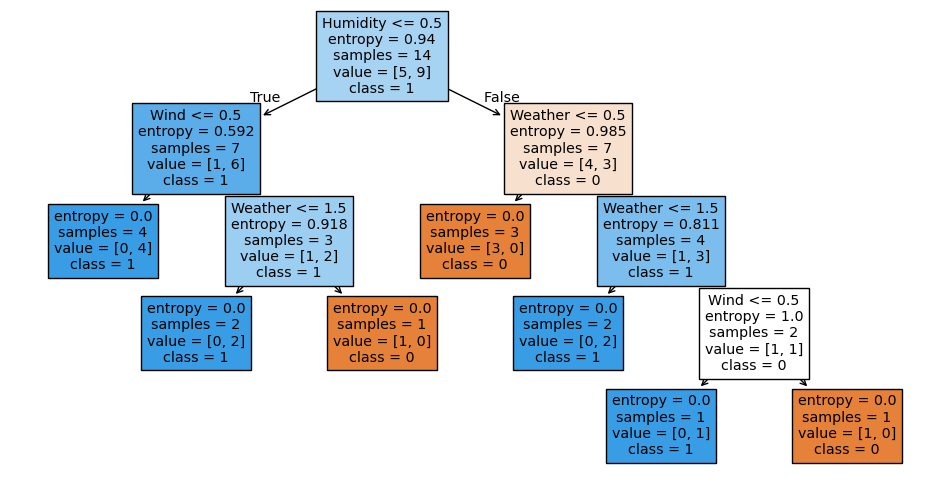

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)
plt.figure(figsize=(12, 6))
tree.plot_tree(clf, feature_names=['Weather', 'Temperature', 'Humidity', 'Wind'], class_names=['0', '1'], filled=True)
plt.show()

# 2. drug.exe data 처리

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_file/drug200.csv')

df['Sex']=df['Sex'].replace({'F':2,'M':1})
df['BP']=df['BP'].replace({'LOW':1,'NORMAL':0,'HIGH':2})
df['Cholesterol']=df['Cholesterol'].replace({'LOW':1,'NORMAL':0,'HIGH':2})
df['Drug']=df['Drug'].replace({'drugA':1,'drugB':2,'drugC':3,'drugX':4,'drugY':5})
df.head()

X = np.column_stack([df['Sex'], df['BP'], df['Cholesterol']])
y = df['Drug']

<ipython-input-17-3158be758320>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'F':2,'M':1})
<ipython-input-17-3158be758320>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP']=df['BP'].replace({'LOW':1,'NORMAL':0,'HIGH':2})
<ipython-input-17-3158be758320>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('f

In [18]:
def entropy(y):
    values, counts = np.unique(y, return_counts = True)
    p = counts / counts.sum()
    return -np.sum(p * np.log2(p))

total_entropy = entropy(y)
print(f'전체 데이터 엔트로피 : {total_entropy:.4f}')

for feature_idx in range(X.shape[1]):
    feature_values = np.unique(X[:, feature_idx])
    feature_entropy = 0
    for value in feature_values:
        idx = X[:, feature_idx] == value
        subset_y = y[idx]
        weight = len(subset_y) / len(y)
        subset_entropy = entropy(subset_y)
        feature_entropy += weight * subset_entropy
    info_gain = total_entropy - feature_entropy
    print(f'Feature {feature_idx}의 정보 이득 : {info_gain:.4f}')

전체 데이터 엔트로피 : 1.9688
Feature 0의 정보 이득 : 0.0077
Feature 1의 정보 이득 : 0.6201
Feature 2의 정보 이득 : 0.0931


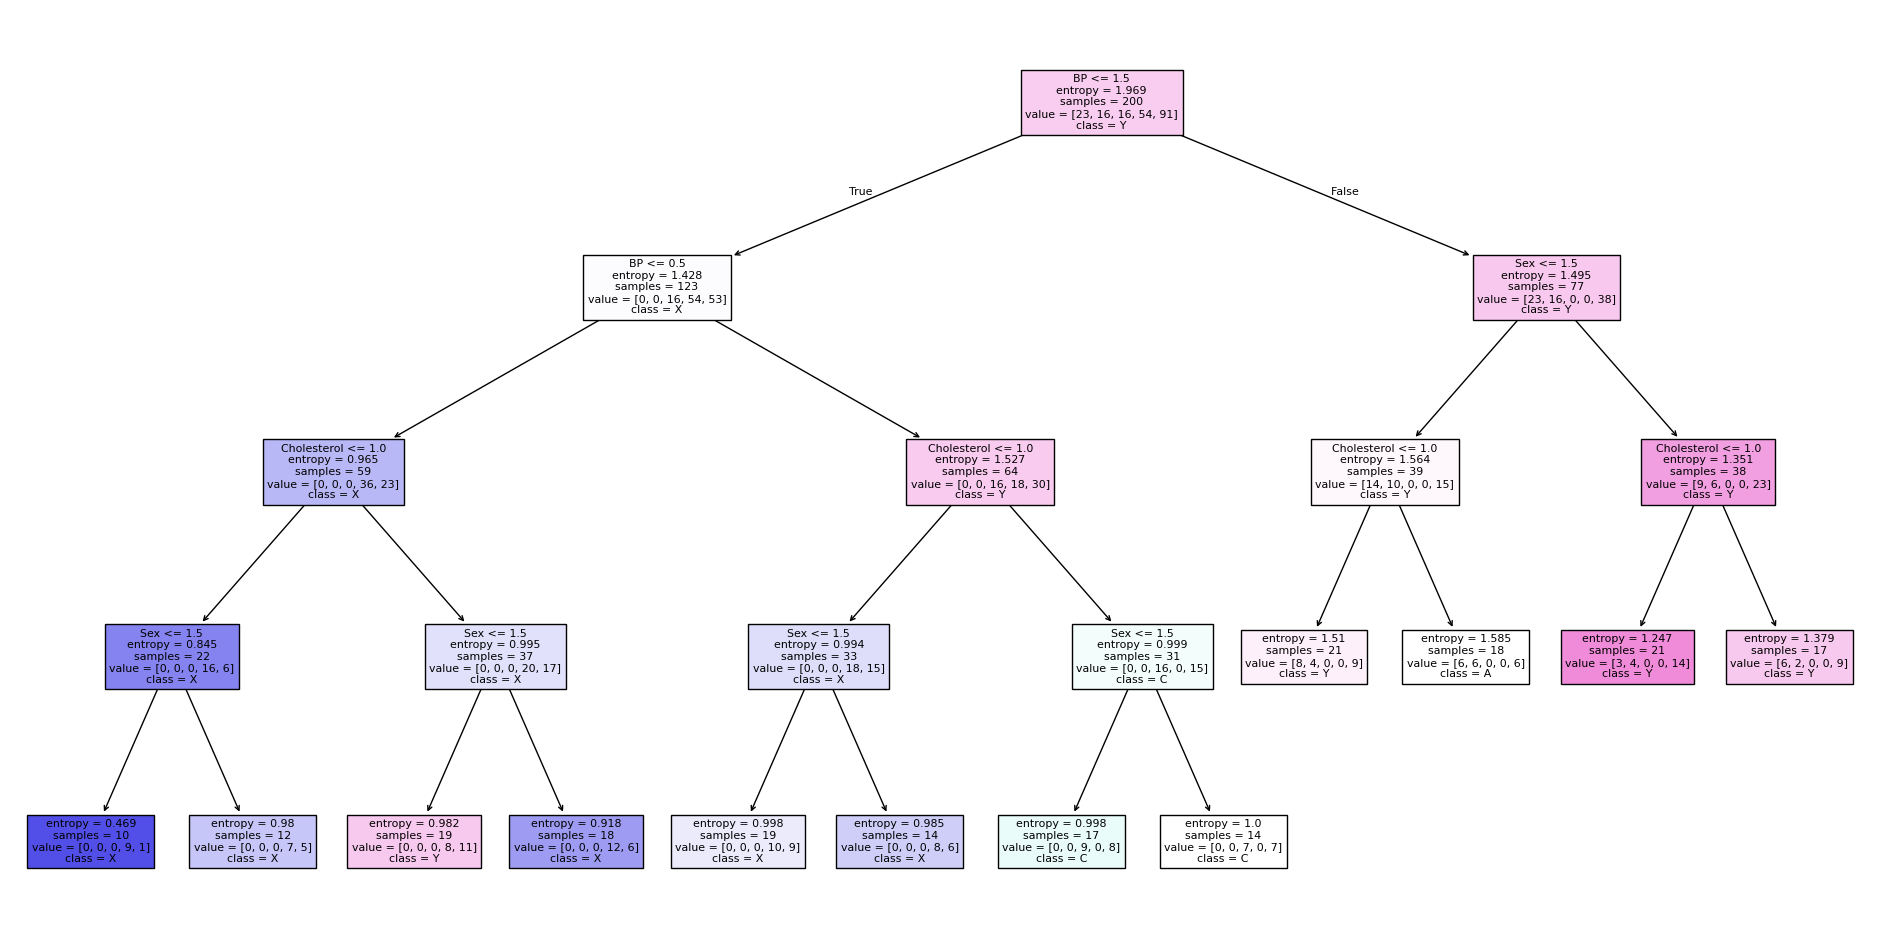

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X, y)
plt.figure(figsize=(24, 12))
tree.plot_tree(clf, feature_names=['Sex', 'BP', 'Cholesterol'], class_names=['A','B', 'C', 'X', 'Y'], filled=True)
plt.show()